# Sentiment Score/Label from a list of news for a single stock

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
sentences = ["Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales.",
             "Bids or offers include at least 1,000 shares and the value of the shares must correspond to at least EUR 4,000.",
             "Raute reported a loss per share of EUR 0.86 for the first half of 2009 , against EPS of EUR 0.74 in the corresponding period of 2008.",
             ]
results = pipe(sentences)
print(results)

[{'label': 'positive', 'score': 0.9997367262840271}, {'label': 'neutral', 'score': 0.9998949766159058}, {'label': 'negative', 'score': 0.9988164901733398}]


In [ ]:
results[0]['label']

'positive'

In [ ]:
neg = ["The stock market crashed today, wiping out billions of dollars in value.",
        "Investors are losing confidence in the stock market due to the ongoing economic uncertainty.",
        "Stock prices plummeted after the company announced disappointing earnings results."]
print(pipe(neg))

[{'label': 'negative', 'score': 0.9968589544296265}, {'label': 'negative', 'score': 0.9985144734382629}, {'label': 'negative', 'score': 0.9985417127609253}]


In [ ]:
print(pipe(sentences+neg))

[{'label': 'positive', 'score': 0.9997367262840271}, {'label': 'neutral', 'score': 0.9998949766159058}, {'label': 'negative', 'score': 0.9988164901733398}, {'label': 'negative', 'score': 0.9968589544296265}, {'label': 'negative', 'score': 0.9985144734382629}, {'label': 'negative', 'score': 0.9985417127609253}]


In [ ]:
pipe('hi')

[{'label': 'neutral', 'score': 0.9998612403869629}]

In [ ]:
import matplotlib.pyplot as plt

def get_weighted_sentiment(news_list, k):
    # Get sentiment predictions for each news article
    # Input: a list of news
    results = pipe(news_list)

    # Sort the results by confidence score in descending order, top k
    n = k
    if len(news_list) <= n:
        sorted_results = results
    else:
        sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)[:n]
        length_news_selected = n

    print('number of top news:', len(sorted_results))

    # Get a pie chart
    label_counts = {}
    for dictionary in sorted_results:
        label = dictionary['label']
        if label not in label_counts:
            label_counts[label] = 0
        label_counts[label] += 1

    plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%')
    plt.title('Label Distribution')

    # Calculate weighted average sentiment score: confidence score as weight, label as score
    total_score = 0.0
    #total_weight = 0.0
    for result in sorted_results:
        score = result['score']
        label = result['label']
        weight = score
        if label == 'positive':
            weight *= 1.0
        elif label == 'negative':
            weight *= -1.0
        total_score += weight
        #total_weight += score
    print("total score:", total_score)
    #weighted_average_score = total_score / total_weight
    average_score = total_score / len(sorted_results)
    print("average score:", average_score)

    #return weighted_average_score
    if average_score == 0.5:
        final_label = "neutral"
    elif average_score > 0.5:
        final_label = "positive"
    elif average_score < 0.5:
        final_label = "negative"
    return final_label

In [ ]:
import matplotlib.pyplot as plt

def get_weighted_sentiment_score(news_list, k):
    # Get sentiment predictions for each news article
    # Input: a list of news
    results = pipe(news_list)

    # Sort the results by confidence score in descending order, top k
    n = k

    if len(news_list) <= n:
        sorted_results = results
    else:
        sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)[:n]
        length_news_selected = n

    print('number of top news:', len(sorted_results))

    # Calculate weighted average sentiment score: confidence score as weight, label as score
    total_score = 0.0
    #total_weight = 0.0
    for result in sorted_results:
        score = result['score']
        label = result['label']
        weight = score
        if label == 'positive':
            weight *= 1.0
        elif label == 'negative':
            weight *= -1.0
        total_score += weight
        #total_weight += score
    print("total score:", total_score)
    #weighted_average_score = total_score / total_weight
    average_score = total_score / len(sorted_results)
    print("average score:", average_score)

    return average_score

In [ ]:
def score_to_label(score):
    #score: integer
    if score > 0.5:
        label = "positive"
    elif score < 0.5:
        label = "negative"
    else:
        label = "neutral"
    return label

number of top news: 3
total score: -0.9946814775466919
average score: -0.33156049251556396
Weighted Average Sentiment Score: negative


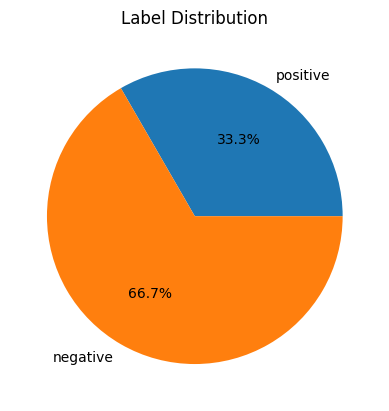

In [ ]:
news_list = [
    "Apple announced record profits for the quarter, driven by strong sales of the iPhone 12.",
    "Tesla reported disappointing earnings results, sending its stock price plummeting.",
    "The Federal Reserve signaled that it may raise interest rates sooner than expected, causing jitters in the stock market.",
    # add more news articles here...
]

weighted_average_score = get_weighted_sentiment(news_list, 3)

print("Weighted Average Sentiment Score:", weighted_average_score)

number of top news: 3
total score: 1.000815212726593
average score: 0.3336050709088643


'negative'

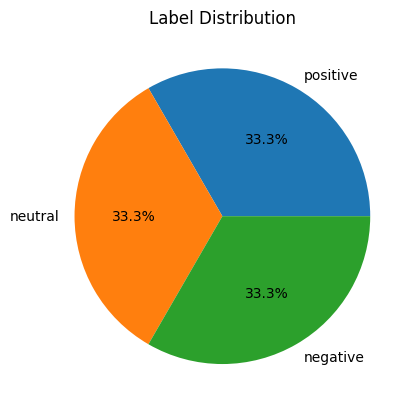

In [ ]:
get_weighted_sentiment(sentences, 3)

number of top news: 3
total score: -2.9939151406288147
average score: -0.9979717135429382


'negative'

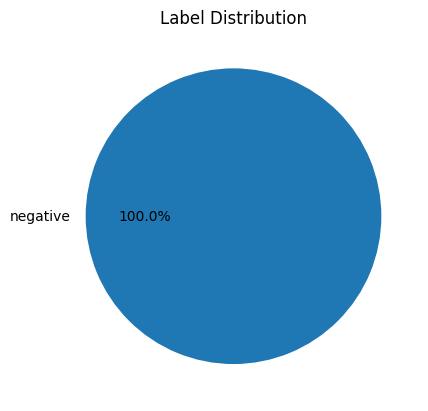

In [ ]:
get_weighted_sentiment(neg, 3)

# Get news and pair with stock

In [ ]:
api_key = "afa4c63381e545c185cbedd3917691b2"

In [ ]:
import requests
import json
import pandas as pd

def get_stock_news(ticker):
    # ticker: stock ticker, e.g., 'TSLA'; data: YY/MM/DD, e.g., '2023/07/01'

    # Create a connection to the Alpha Vantage API.
    api_key = "afa4c63381e545c185cbedd3917691b2"
    base_url = "https://www.alphavantage.co/query"

    # Get the stock quote for the given stock ticker.
    #params = {"function": "TIME_SERIES_DAILY", "symbol": ticker, "apikey": api_key}
    #response = requests.get(base_url, params=params)
    #data = json.loads(response.text)

    # Get the latest news articles for the given stock ticker.
    news_url = "https://newsapi.org/v2/everything"
    #params = {"q": ticker, "from": "2023-06-01", "apikey": api_key}
    params = {"q": ticker, "apikey": api_key}
    response = requests.get(news_url, params=params)
    data = json.loads(response.text)

    # Create a dataframe with the data and time of the news articles.
    articles = data["articles"]
    df = pd.DataFrame(articles)
    df["ticker"] = ticker
    df["date"] = pd.to_datetime(df["publishedAt"])
    df["time"] = df["date"].dt.time
    df["date"] = df["date"].dt.strftime("%Y/%m/%d")

    # Return the dataframe.
    return df

In [ ]:
def exact_date(ticker, date, r):
    # k: random k news
    df = get_stock_news(ticker)

    # Select the dataframe with the specific date.
    df = df[df["date"] == date]

    # If the number of rows in the dataframe is greater than 10, we random choose ten rows.
    num = r
    if len(df) > num:
        df = df.sample(n=num)
        print('number of random news:', num)
    else:
        print('number of random news:', len(df))

    return df

In [ ]:
#ticker = 'TSLA'
#date = '2023/07/13'
##random_news
#r = 10
##top_news based on confidence score
#t = 5
def label(ticker, date, r, t):
    example = exact_date(ticker, date, r)
    # Use content, title and description of a article for the sentiment analysis
    content = example["content"].tolist()
    title = example["title"].tolist()
    description = example["description"].tolist()
    text_list = content+title+description
    text_list = list(filter(lambda x: x is not None, text_list))
    if len(text_list) == 0:
        pass
    elif len(text_list) <= t:
        return get_weighted_sentiment(text_list, len(text_list))
    else:
        return get_weighted_sentiment(text_list, t)

def score(ticker, date, r, t):
    example = exact_date(ticker, date, r)
    # Use content, title and description of a article for the sentiment analysis
    content = example["content"].tolist()
    title = example["title"].tolist()
    description = example["description"].tolist()
    text_list = content+title+description
    text_list = list(filter(lambda x: x is not None, text_list))
    if len(text_list) == 0:
        pass
    elif len(text_list) <= t:
        return get_weighted_sentiment_score(text_list, len(text_list))
    else:
        return get_weighted_sentiment_score(text_list, t)


number of random news: 5
number of top news: 5
total score: 4.998834192752838
average score: 0.9997668385505676


'positive'

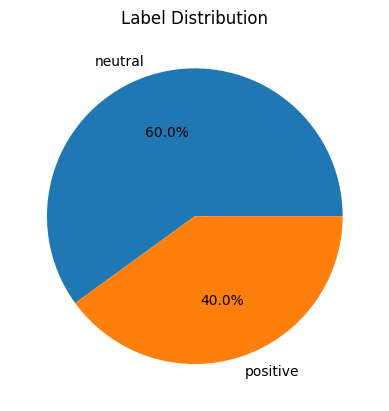

In [ ]:
label('SPX', '2023/07/12', 10, 5)

number of random news: 3
number of top news: 5
total score: 4.998941898345947
average score: 0.9997883796691894


'positive'

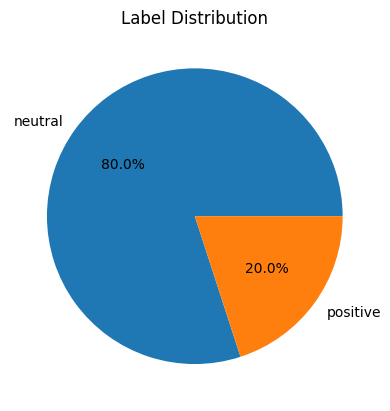

In [ ]:
label('TSLA', '2023/07/12', 10, 5)

number of random news: 3
number of top news: 5
total score: 4.997721791267395
average score: 0.999544358253479


'positive'

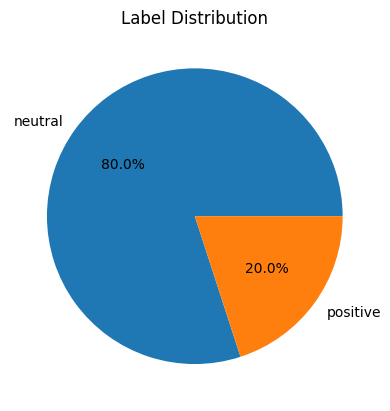

In [ ]:
label('TSLA', '2023/07/13', 10, 5)

A ticker is simply the stock code. Dates are in YY/MM/DD format. random_news (r) specifies the number of news articles you want to randomly scrape from the website for a given stock on a given date. top_news (t) specifies the number of news articles you want to use for sentiment analysis, selected from all of the randomly scraped news articles for a given stock on a given date.


In [ ]:
import dateutil.parser

def str_to_date(str_date):
    #input string
    #convert string to date
    date_object = dateutil.parser.parse(str_date)
    #leave time keep date
    date = date_object.date()

    return date

def date_to_str(date):
    #input date
    #convert date to str
    output = date.strftime("%Y/%m/%d")

    return output


In [ ]:
import datetime

def previous_dates(date, num):
    #date: the current date, string
    #num: no of previous dates we want, integer

    delta = datetime.timedelta(days=1)

    current_date = str_to_date(date)
    dates_str = []
    n = 0

    while n < num:
        previous_date = current_date - delta
        current_date = previous_date
        dates_str.append(date_to_str(previous_date))
        n += 1
    print("dates considered:", dates_str)
    return dates_str

In [ ]:
previous_dates('2023/07/13',3)

dates considered: ['2023/07/12', '2023/07/11', '2023/07/10']


['2023/07/12', '2023/07/11', '2023/07/10']

In [ ]:
def exact_n_previous_dates(ticker, date, r, n):
    # r: random r news
    # n: no of previous dates
    df = get_stock_news(ticker)

    dates = previous_dates(date, n)

    # Select the dataframe with the specific date.
    df = df[df["date"].isin(dates)]

    # If the number of rows in the dataframe is greater than 10, we random choose ten rows.
    num = r
    if len(df) > num:
        df = df.sample(n=num)
        print('number of random news:', num)
    else:
        print('number of random news:', len(df))

    # Return the news in n previous dates
    return df

In [ ]:
example = exact_n_previous_dates('SPX', '2023/07/11', 10, 2)

dates considered: ['2023/07/10', '2023/07/09']
number of random news: 5


In [ ]:
#ticker = 'TSLA'
#date = '2023/07/13'
##random_news
#r = 10
##top_news based on confidence score
#t = 5
def label_with_previous_n_dates(ticker, date, r, t, n):
    # n: no of previous dates
    example = exact_n_previous_dates(ticker, date, r, n)
    # Use content, title and description of a article for the sentiment analysis
    content = example["content"].tolist()
    title = example["title"].tolist()
    description = example["description"].tolist()
    text_list = content+title+description
    text_list = list(filter(lambda x: x is not None, text_list))
    if len(text_list) == 0:
        pass
    elif len(text_list) <= t:
        return get_weighted_sentiment(text_list, len(text_list))
    else:
        return get_weighted_sentiment(text_list, t)

def score_with_previous_n_dates(ticker, date, r, t, n):
    example = exact_n_previous_dates(ticker, date, r, n)
    # Use content, title and description of a article for the sentiment analysis
    content = example["content"].tolist()
    title = example["title"].tolist()
    description = example["description"].tolist()
    text_list = content+title+description
    text_list = list(filter(lambda x: x is not None, text_list))
    if len(text_list) == 0:
        pass
    elif len(text_list) <= t:
        return get_weighted_sentiment_score(text_list, len(text_list))
    else:
        return get_weighted_sentiment_score(text_list, t)


dates considered: ['2023/07/16', '2023/07/15', '2023/07/14', '2023/07/13', '2023/07/12']
number of random news: 13
number of top news: 10
total score: 9.998501539230347
average score: 0.9998501539230347


'positive'

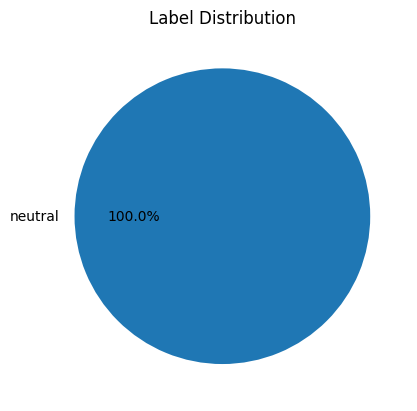

In [ ]:
# the current day: for prediction of next coming day
label_with_previous_n_dates('TSLA', '2023/07/17', 20, 10, 5)

In [ ]:
# the oldest available day
label_with_previous_n_dates('TSLA', '2023/06/17', 10, 5, 5)

dates considered: ['2023/06/16', '2023/06/15', '2023/06/14', '2023/06/13', '2023/06/12']
number of random news: 0


dates considered: ['2023/07/10', '2023/07/09', '2023/07/08', '2023/07/07', '2023/07/06']
number of random news: 17
number of top news: 5
total score: 4.999443411827087
average score: 0.9998886823654175


'positive'

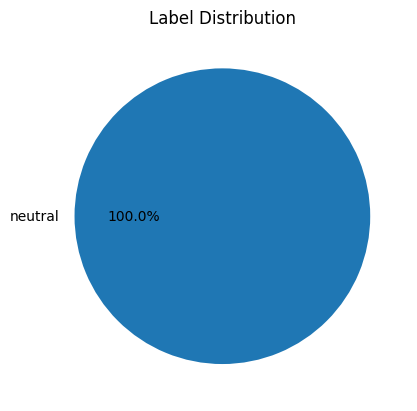

In [ ]:
# the oldest available day
label_with_previous_n_dates('SPX', '2023/07/11', 17, 5, 5)

The latest available date for news is two days before the current day. For example, on July 14, 2023, the latest available news date would be July 12, 2023.

In [ ]:
import datetime

def get_sentiment_label(beginning_date, end_date, ticker, r, t, n):
  """Creates a trend graph that shows the sentiment label for each date in the 1-month period.

  Args:
    beginning_date: The beginning date of the 1-month period.
    end_date: The end date of the 1-month period.
    ticker = 'TSLA'
    date = '2023/07/13'
    #random_news
    r = 10
    #top_news based on confidence score
    t = 5

  Returns:
    A plot object that shows the trend graph.
  """

  delta = datetime.timedelta(days=1)

  current_date = str_to_date(beginning_date)
  dates_str = []
  dates_date = []
  while current_date <= str_to_date(end_date):
    dates_str.append(date_to_str(current_date))
    dates_date.append(current_date)
    current_date += delta

  sentiment_labels = []
  for date in dates_str:
    print(date)
    sentiment_labels.append(label_with_previous_n_dates(ticker, date, r, t, n))

  # Create a sample DataFrame
  sentiment = {
    'Date': dates_date,
    'sentiment': sentiment_labels
  }

  df = pd.DataFrame(sentiment)

  return df

2023/06/17
dates considered: ['2023/06/16', '2023/06/15', '2023/06/14']
number of random news: 0
2023/06/18
dates considered: ['2023/06/17', '2023/06/16', '2023/06/15']
number of random news: 0
2023/06/19
dates considered: ['2023/06/18', '2023/06/17', '2023/06/16']
number of random news: 1
number of top news: 3
total score: 2.9996639490127563
average score: 0.9998879830042521
2023/06/20
dates considered: ['2023/06/19', '2023/06/18', '2023/06/17']
number of random news: 3
number of top news: 9
total score: 7.037625253200531
average score: 0.7819583614667257
2023/06/21
dates considered: ['2023/06/20', '2023/06/19', '2023/06/18']
number of random news: 6
number of top news: 18
total score: 16.029387652873993
average score: 0.8905215362707773
2023/06/22
dates considered: ['2023/06/21', '2023/06/20', '2023/06/19']
number of random news: 9
number of top news: 20
total score: 17.996075987815857
average score: 0.8998037993907928
2023/06/23
dates considered: ['2023/06/22', '2023/06/21', '2023/0

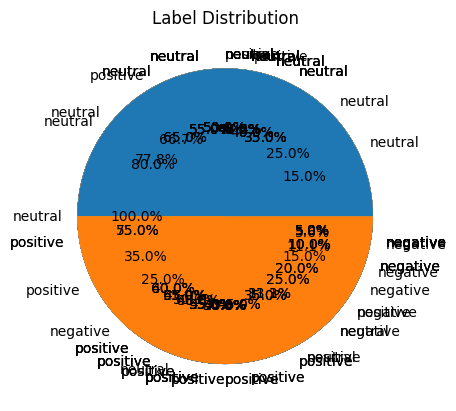

In [ ]:
SPX_label = get_sentiment_label('2023/06/17', '2023/07/17', 'SPX', 50, 20, 3)

In [ ]:
SPX_label

,Date,sentiment
0,2023-06-17,None
1,2023-06-18,None
2,2023-06-19,positive
3,2023-06-20,positive
4,2023-06-21,positive
5,2023-06-22,positive
6,2023-06-23,positive
7,2023-06-24,positive
8,2023-06-25,positive
9,2023-06-26,positive


In [ ]:
SPX_label.to_csv('SPX_sentiment.csv')

2023/06/17
dates considered: ['2023/06/16', '2023/06/15', '2023/06/14', '2023/06/13', '2023/06/12']
number of random news: 0
2023/06/18
dates considered: ['2023/06/17', '2023/06/16', '2023/06/15', '2023/06/14', '2023/06/13']
number of random news: 0
2023/06/19
dates considered: ['2023/06/18', '2023/06/17', '2023/06/16', '2023/06/15', '2023/06/14']
number of random news: 0
2023/06/20
dates considered: ['2023/06/19', '2023/06/18', '2023/06/17', '2023/06/16', '2023/06/15']
number of random news: 1
number of top news: 3
total score: 2.998458743095398
average score: 0.999486247698466
2023/06/21
dates considered: ['2023/06/20', '2023/06/19', '2023/06/18', '2023/06/17', '2023/06/16']
number of random news: 8
number of top news: 20
total score: 15.996057331562042
average score: 0.7998028665781021
2023/06/22
dates considered: ['2023/06/21', '2023/06/20', '2023/06/19', '2023/06/18', '2023/06/17']
number of random news: 14
number of top news: 20
total score: 19.99247944355011
average score: 0.999

,Date,sentiment
0,2023-06-17,None
1,2023-06-18,None
2,2023-06-19,None
3,2023-06-20,positive
4,2023-06-21,positive
5,2023-06-22,positive
6,2023-06-23,positive
7,2023-06-24,positive
8,2023-06-25,positive
9,2023-06-26,positive


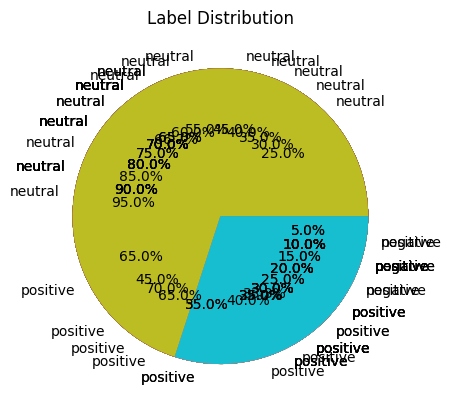

In [ ]:
TSLA_label = get_sentiment_label('2023/06/17', '2023/07/17', 'TSLA', 50, 20, 5)
TSLA_label

In [ ]:
TSLA_label.to_csv('TSLA_sentiment.csv')

# Visualization

In [ ]:
import datetime

def get_sentiment_score(beginning_date, end_date, ticker, r, t, n):
  """Creates a trend graph that shows the sentiment label for each date in the 1-month period.

  Args:
    beginning_date: The beginning date of the 1-month period.
    end_date: The end date of the 1-month period.
    ticker = 'TSLA'
    date = '2023/07/13'
    #random_news
    r = 10
    #top_news based on confidence score
    t = 5

  Returns:
    A plot object that shows the trend graph.
  """

  delta = datetime.timedelta(days=1)

  current_date = str_to_date(beginning_date)
  dates_str = []
  dates_date = []
  while current_date <= str_to_date(end_date):
    dates_str.append(date_to_str(current_date))
    dates_date.append(current_date)
    current_date += delta

  sentiment_labels = []
  for date in dates_str:
    print(date)
    sentiment_labels.append(score_with_previous_n_dates(ticker, date, r, t, n))

  # Create a sample DataFrame
  sentiment = {
    'Date': dates_date,
    'sentiment': sentiment_labels
  }

  df = pd.DataFrame(sentiment)

  return df

def lineplot_sentiment(df):

  # Create a line plot
  plt.plot(df['Date'], df['sentiment'], label='Sentiment')

  # Add a title, axes labels and legend to the plot
  plt.title('Sentiment Scores')
  plt.xlabel('Date')
  plt.ylabel('Sentiment')
  plt.legend()

  # Set the x-axis limits
  plt.xticks(df['Date'])
  # Adjust the x-axis tick labels to fit within the plot size
  plt.gcf().autofmt_xdate()

  # Show the plot
  plt.show()

In [ ]:
sentiment = get_sentiment_score('2023/06/17', '2023/07/17', 'TSLA', 50, 20, 2)

2023/06/17
dates considered: ['2023/06/16', '2023/06/15']
number of random news: 0
2023/06/18
dates considered: ['2023/06/17', '2023/06/16']
number of random news: 0
2023/06/19
dates considered: ['2023/06/18', '2023/06/17']
number of random news: 0
2023/06/20
dates considered: ['2023/06/19', '2023/06/18']
number of random news: 1
number of top news: 3
total score: 2.998458743095398
average score: 0.999486247698466
2023/06/21
dates considered: ['2023/06/20', '2023/06/19']
number of random news: 8
number of top news: 20
total score: 15.996057331562042
average score: 0.7998028665781021
2023/06/22
dates considered: ['2023/06/21', '2023/06/20']
number of random news: 13
number of top news: 20
total score: 19.991764426231384
average score: 0.9995882213115692
2023/06/23
dates considered: ['2023/06/22', '2023/06/21']
number of random news: 10
number of top news: 20
total score: 15.992726027965546
average score: 0.7996363013982772
2023/06/24
dates considered: ['2023/06/23', '2023/06/22']
number

In [ ]:
sentiment["label"] = sentiment["sentiment"].apply(lambda x: "positive" if x > 0 else "negative" if x < 0 else "neutral")
sentiment

,Date,sentiment,label
0,2023-06-17,NaN,neutral
1,2023-06-18,NaN,neutral
2,2023-06-19,NaN,neutral
3,2023-06-20,0.999486,positive
4,2023-06-21,0.799803,positive
5,2023-06-22,0.999588,positive
6,2023-06-23,0.799636,positive
7,2023-06-24,0.667734,positive
8,2023-06-25,0.215116,positive
9,2023-06-26,0.113926,positive


In [ ]:
sentiment.to_csv('TSLA_sentiment.csv')

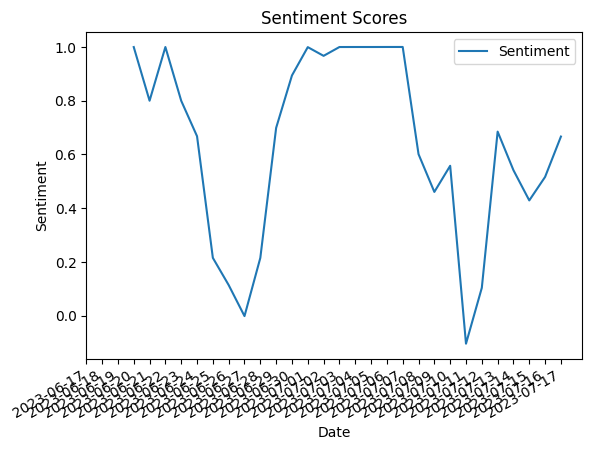

In [ ]:
lineplot_sentiment(sentiment)

In [ ]:
import datetime

def barplot_sentiment(df):

  # Create a bar plot
  plt.bar(df['Date'], df['sentiment'], label='Sentiment')

  # Add a title, axes labels and legend to the plot
  plt.title('Sentiment Scores')
  plt.xlabel('Date')
  plt.ylabel('Sentiment')
  plt.legend()

  # Set the x-axis limits
  plt.xticks(df['Date'])
  # Adjust the x-axis tick labels to fit within the plot size
  plt.gcf().autofmt_xdate()
  # Adjust the y-limits of the bar plot
  # set ylim to be just above the highest value in y
  # plt.ylim(min(df['sentiment']) - 1, max(df['sentiment']) + 1)

  # Show the plot
  plt.show()

In [ ]:
barplot_sentiment(sentiment)

In [ ]:
SPX = get_sentiment_score('2023/06/17', '2023/07/17', 'SPX', 50, 20, 2)
SPX["label"] = SPX["sentiment"].apply(lambda x: "positive" if x > 0 else "negative" if x < 0 else "neutral")
SPX.to_csv('SPX_sentiment.csv')

2023/06/17
dates considered: ['2023/06/16', '2023/06/15']
number of random news: 8
number of top news: 20
total score: 9.85513985157013
average score: 0.49275699257850647
2023/06/18
dates considered: ['2023/06/17', '2023/06/16']
number of random news: 8
number of top news: 20
total score: 9.85513985157013
average score: 0.49275699257850647
2023/06/19
dates considered: ['2023/06/18', '2023/06/17']
number of random news: 1
number of top news: 3
total score: 2.9996639490127563
average score: 0.9998879830042521
2023/06/20
dates considered: ['2023/06/19', '2023/06/18']
number of random news: 3
number of top news: 9
total score: 7.037625253200531
average score: 0.7819583614667257
2023/06/21
dates considered: ['2023/06/20', '2023/06/19']
number of random news: 4
number of top news: 12
total score: 10.035015046596527
average score: 0.8362512538830439
2023/06/22
dates considered: ['2023/06/21', '2023/06/20']
number of random news: 5
number of top news: 15
total score: 12.694753468036652
average

## Link the sentiment score with price

In [ ]:
import yfinance as yf
import datetime

def get_stock_price(start_date, end_date, ticker):
    # Set the start and end dates
    start_date = str_to_date(start_date)
    end_date = str_to_date(end_date)

    # Get the stock data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Extract the daily closing prices
    closing_prices = data['Close']

    df = closing_prices.to_frame('price')
    df = df.reset_index()
    df['Date'] = df['Date'].dt.date

    return df

def plot_stock(df):

    # Create a line plot
    plt.plot(df['Date'], df['price'], label='Stock Price')

    # Set axes labels
    plt.xlabel('Date')

    # Set the x-axis limits
    plt.xticks(df['Date'])

    # Set the title ,legend and axes labels
    plt.title('Stock Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()

    # Adjust the x-axis tick labels to fit within the plot size
    plt.gcf().autofmt_xdate()

    # Show the plot
    plt.show()

In [ ]:
stock = get_stock_price('2023/06/17', '2023/07/17', 'TSLA')
stock

[*********************100%***********************]  1 of 1 completed


,Date,price
0,2023-06-20,274.450012
1,2023-06-21,259.459991
2,2023-06-22,264.609985
3,2023-06-23,256.600006
4,2023-06-26,241.050003
5,2023-06-27,250.210007
6,2023-06-28,256.239990
7,2023-06-29,257.500000
8,2023-06-30,261.769989
9,2023-07-03,279.820007


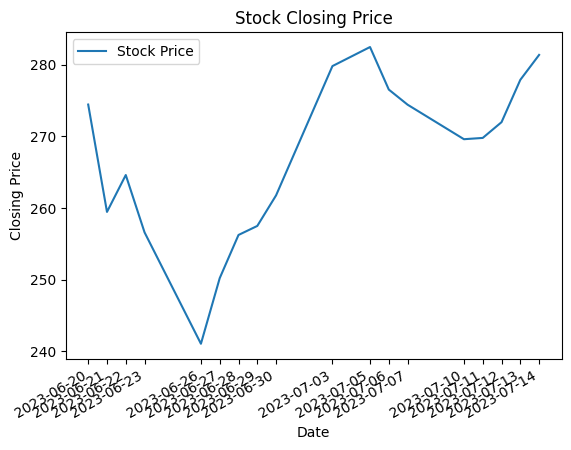

In [ ]:
plot_stock(stock)

In [ ]:
import yfinance as yf
import datetime
from sklearn.preprocessing import MinMaxScaler

def merge_stock_with_sentiment_data(stock, sentiment):

    # Merge the two dataframes using a left join on the 'Date' column
    merged = pd.merge(sentiment, stock, on='Date', how='left')

    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    merged[['sentiment', 'price']] = scaler.fit_transform(merged[['sentiment', 'price']])

    return merged

def plot_stock_with_sentiment(merged):

    # Create a line plot with two lines
    plt.plot(merged['Date'], merged['sentiment'], label='Sentiment')
    plt.plot(merged['Date'], merged['price'], label='Stock Price')

    # Add a title and legend to the plot
    plt.title('Sentiment Scores and Stock Prices')
    plt.legend()

    # Set axes labels
    plt.xlabel('Date')

    # Set the x-axis limits
    plt.xticks(merged['Date'])
    # Adjust the x-axis tick labels to fit within the plot size
    plt.gcf().autofmt_xdate()
    plt.ylim(-1, 2)

    # Show the plot
    plt.show()

In [ ]:
merge = merge_stock_with_sentiment_data(stock, sentiment)
merge

,Date,sentiment,price
0,2023-06-17,0.387594,NaN
1,2023-06-18,0.693797,NaN
2,2023-06-19,1.000000,NaN
3,2023-06-20,0.999664,0.806179
4,2023-06-21,0.818813,0.444364
5,2023-06-22,0.999757,0.568670
6,2023-06-23,0.818662,0.375332
7,2023-06-24,0.709893,NaN
8,2023-06-25,0.367636,NaN
9,2023-06-26,0.197619,0.000000


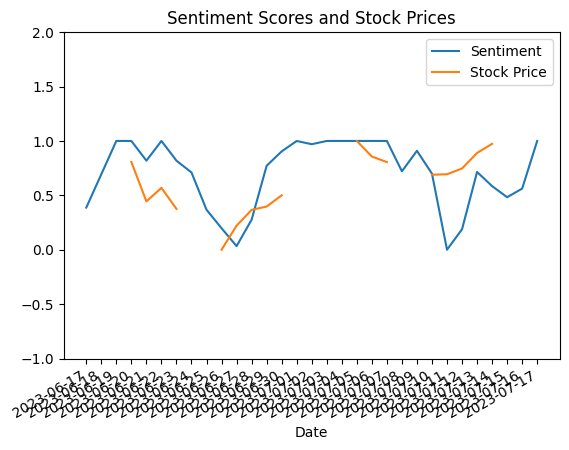

In [ ]:
plot_stock_with_sentiment(merge)

[*********************100%***********************]  1 of 1 completed


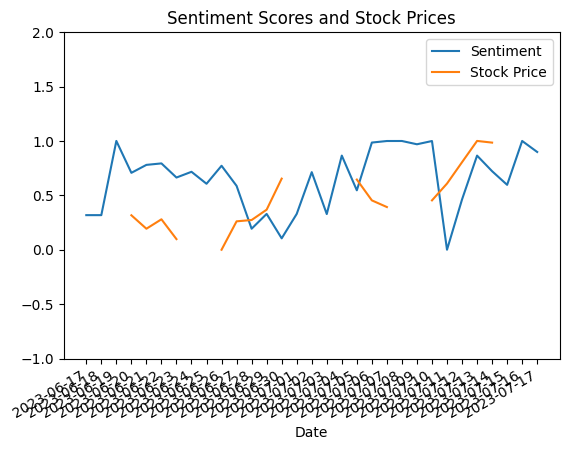

In [ ]:
#SPX
SPX_stock = get_stock_price('2023/06/17', '2023/07/17', 'SPY')
SPX_merge = merge_stock_with_sentiment_data(SPX_stock, SPX)
plot_stock_with_sentiment(SPX_merge)